In [1]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [2]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier,self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        self.dropout=nn.Dropout(p=0.2)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [3]:

model = Classifier()
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)

epochs=30
steps=0

train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps = torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals= top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
                
        model.train()
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch  {}/{}".format(e+1,epochs),
              "Training Loss:{:.3f}..".format(running_loss/len(trainloader)),
             "Test Loss: {:.3f}..".format(test_loss/len(testloader)),
             "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

('Epoch  1/30', 'Training Loss:0.609..', 'Test Loss: 0.472..', 'Test Accuracy: 0.834')
('Epoch  2/30', 'Training Loss:0.479..', 'Test Loss: 0.435..', 'Test Accuracy: 0.846')
('Epoch  3/30', 'Training Loss:0.454..', 'Test Loss: 0.408..', 'Test Accuracy: 0.851')
('Epoch  4/30', 'Training Loss:0.430..', 'Test Loss: 0.417..', 'Test Accuracy: 0.853')
('Epoch  5/30', 'Training Loss:0.417..', 'Test Loss: 0.409..', 'Test Accuracy: 0.856')
('Epoch  6/30', 'Training Loss:0.408..', 'Test Loss: 0.408..', 'Test Accuracy: 0.854')
('Epoch  7/30', 'Training Loss:0.408..', 'Test Loss: 0.410..', 'Test Accuracy: 0.858')
('Epoch  8/30', 'Training Loss:0.399..', 'Test Loss: 0.416..', 'Test Accuracy: 0.855')
('Epoch  9/30', 'Training Loss:0.398..', 'Test Loss: 0.405..', 'Test Accuracy: 0.858')
('Epoch  10/30', 'Training Loss:0.389..', 'Test Loss: 0.396..', 'Test Accuracy: 0.860')
('Epoch  11/30', 'Training Loss:0.383..', 'Test Loss: 0.385..', 'Test Accuracy: 0.865')
('Epoch  12/30', 'Training Loss:0.384..',

In [4]:
import matplotlib.pyplot as plt

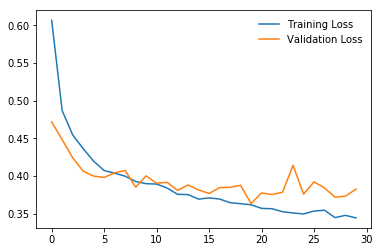

In [5]:
plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Validation Loss')
plt.legend(frameon=False)

In [7]:
print "Our Model: \n\n",model,"\n"
print "The State dict keys: \n\n",model.state_dict().keys()

Our Model: 

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
) 

The State dict keys: 

['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias']


In [8]:
torch.save(model.state_dict(),'checkpoint.pth')

In [11]:
state_dict=torch.load('checkpoint.pth')
print state_dict.keys()

['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias']


In [13]:
model.load_state_dict(state_dict)